In [117]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [118]:
# Load the dataset

missing_value=[np.nan,"Unknown"]
df= pd.read_csv("TaxiData.csv",na_values=missing_value)

# Clean the data and handle missing values and columns
df=df.drop('pickup_census_tract',axis=1)
df.dropna(axis=1,how='all') # Removed only those values in which entire row is null

numerical_cols= ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
df[numerical_cols] = df[numerical_cols].interpolate()

df[[ 'dropoff_census_tract', 'payment_type', 'company']] = df[['dropoff_census_tract', 'payment_type', 'company']].fillna(method='ffill').fillna(method='bfill')

myDATA=[ 'pickup_community_area', 'dropoff_community_area', 'pickup_latitude',	'pickup_longitude',	'dropoff_latitude','dropoff_longitude']
df[myDATA] = df[myDATA].fillna(method='ffill').fillna(method='bfill')


## Q 3.a

### Q 3.a.a Create histograms and box plots for both fare and tip amounts

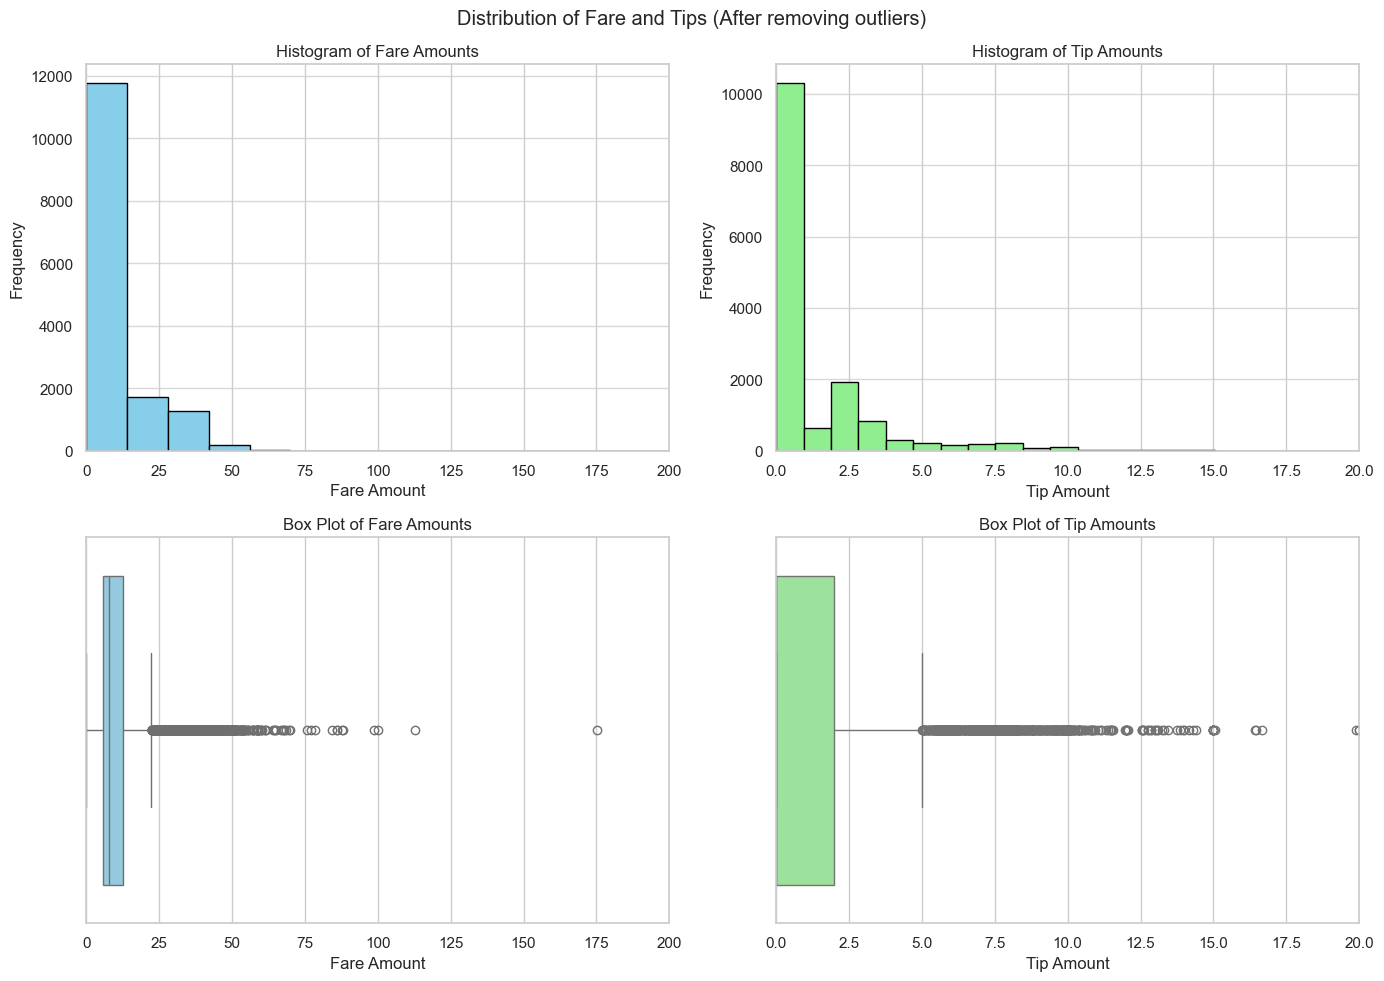

Fare Summary:
 count    15002.000000
mean        11.768216
std         11.538850
min          0.000000
25%          5.850000
50%          7.850000
75%         12.450000
max        700.070000
Name: fare, dtype: float64
Fare Median:  7.85

Tip Summary:
 count    15002.000000
mean         1.076674
std          2.158340
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         47.000000
Name: tips, dtype: float64
Tip Median:  0.0


In [119]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Histogram for Fare
plt.subplot(2, 2, 1)
plt.hist(df['fare'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.grid(axis='y', alpha=0.75)

# Histogram for Tips
plt.subplot(2, 2, 2)
plt.hist(df['tips'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.xlim(0,20)
plt.grid(axis='y', alpha=0.75)

# Box Plot for Fare
plt.subplot(2, 2, 3)
sns.boxplot(x=df['fare'], color='skyblue')
plt.title('Box Plot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.xlim(0,200)

# Box Plot for Tips
plt.subplot(2, 2, 4)
sns.boxplot(x=df['tips'], color='lightgreen')
plt.title('Box Plot of Tip Amounts')
plt.xlabel('Tip Amount')
plt.xlim(0,20)

plt.suptitle("Distribution of Fare and Tips (After removing outliers)")
plt.tight_layout()
plt.show()


print("Fare Summary:\n", df['fare'].describe())
print("Fare Median: ",df['fare'].median())
print("\nTip Summary:\n", df['tips'].describe())
print("Tip Median: ",df['tips'].median())



### Q 3.a.b Identify the range, outliers, and any clusters in the data

### Observations:
- Range for the Fare (0 to 700.07)    
- Range for the Tip (0 to 47)
- Majority of trips (about 2/3rd) have tip zero, likely because the tip is not always given
#### Outliers
- Outliers for Fare 700.07 (source : Summary given above )
- Outliers for Tip 47(source : Summary given above )

#### Detecting Clusters


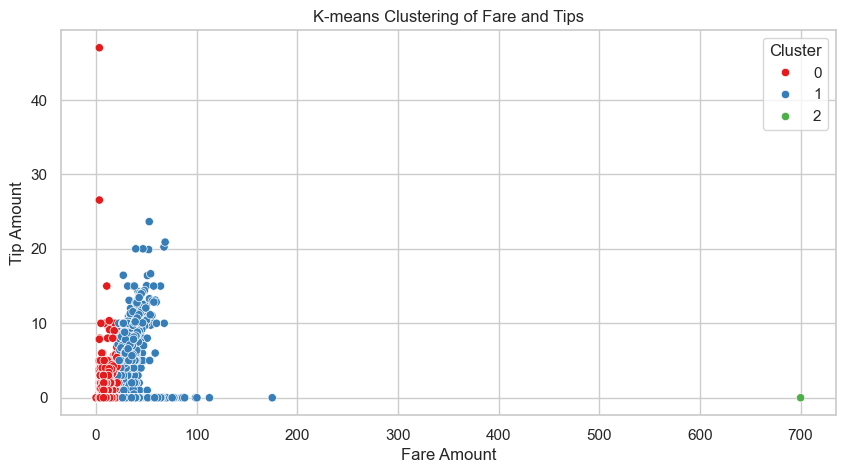

In [120]:
from sklearn.cluster import KMeans

plt.figure(figsize=(10, 5))

# Selecting features for clustering
features = df[['fare', 'tips']]

#Applying K-means clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(features)

sns.scatterplot(data=df, x='fare', y='tips', hue='cluster', palette='Set1')
plt.title('K-means Clustering of Fare and Tips')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.legend(title='Cluster')

plt.show()

Cluster is not well defined, which indicates no deviation from general trend

### Q 3.a.c Key Patterns in Fare & Tip Data:



1. Fares:
- Mostly within $0-50
- Few outliers up to $700

2. Tips:
- Most between $0-5
- Strong correlation with fare amount

3. Notable pattern:
- Clear positive correlation between fares and tips
- One major outlier (~$700 fare with minimal tip)

## Q 3.b

### Q 3.b.a Visualize the frequency of each payment method 

payment_type
Cash           9932
Credit Card    4981
No Charge        81
Dispute           4
Pcard             3
Prcard            1
Name: count, dtype: int64


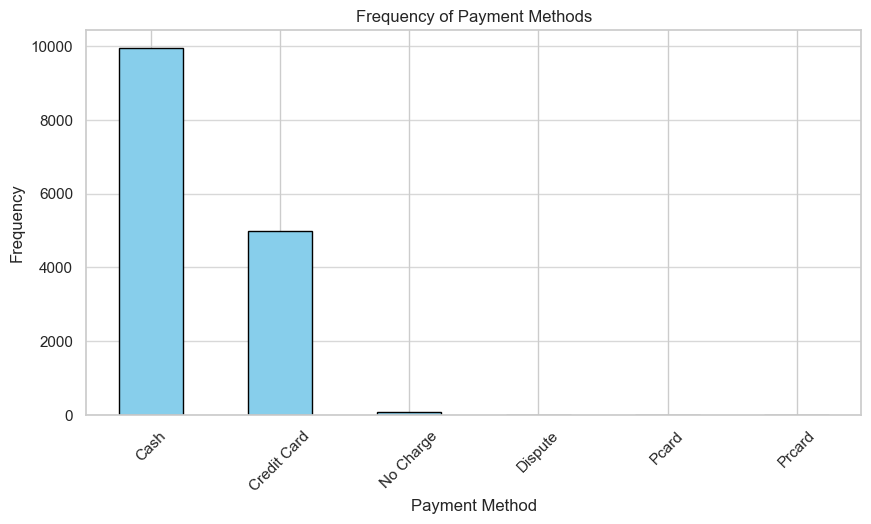

In [121]:
# Count the frequency of each payment method
payment_counts = df['payment_type'].value_counts()
print(payment_counts)

# Bar Chart
plt.figure(figsize=(10, 5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


### Q 3.b.b Key Insights on Payment Methods:



1. Dominant Methods:
- Cash is overwhelmingly preferred (~10,000 trips)
- Credit cards are second most common (~5,000 trips)
- All other methods are minimal

2. Impact on Service Providers: High cash usage means:
- Need reliable cash handling procedures 
- Must ensure drivers carry change
- More complex accounting process

## Q 3.c

### Q 3.c.a Create a box plot to compare tips across different payment methods

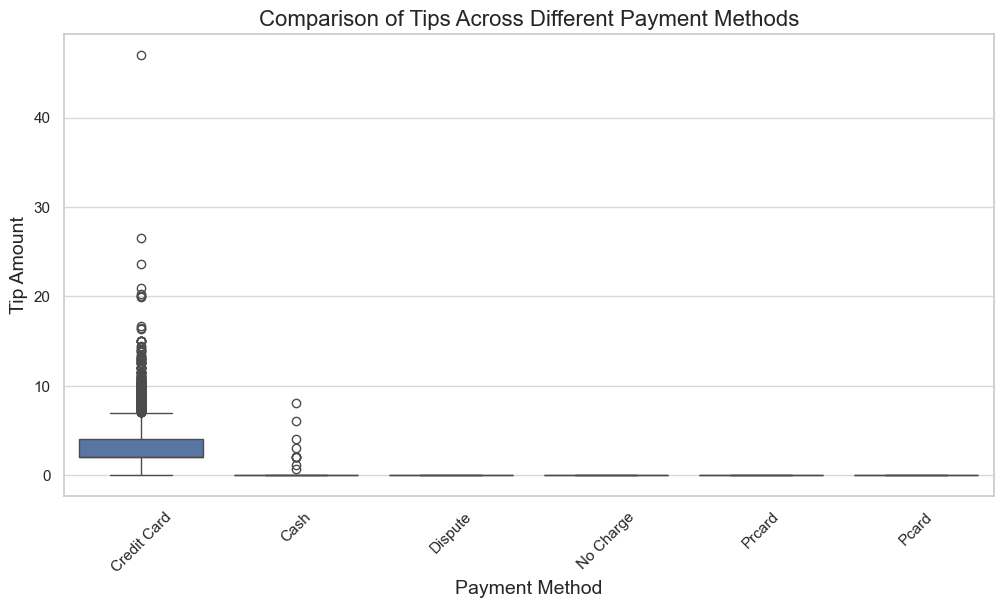

In [122]:
sns.set(style='whitegrid')


plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type', y='tips', data=df)

plt.title('Comparison of Tips Across Different Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Tip Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Q 3.c.b Key Insights on Tipping by Payment Method:



1. Credit Card Tips:
- Highest average tips (~$3-4)
- Widest range of tip amounts

2. Cash Tips:
- Lower average tips (~$1-2)
- Less variation than credit cards

3. Other Methods:
- Minimal to no tipping activity
- Suggests possible recording issues or system limitations

## Q 3.d

### Q 3.d.a Plot a scatter plot showing the relationship between trip distance and fare.

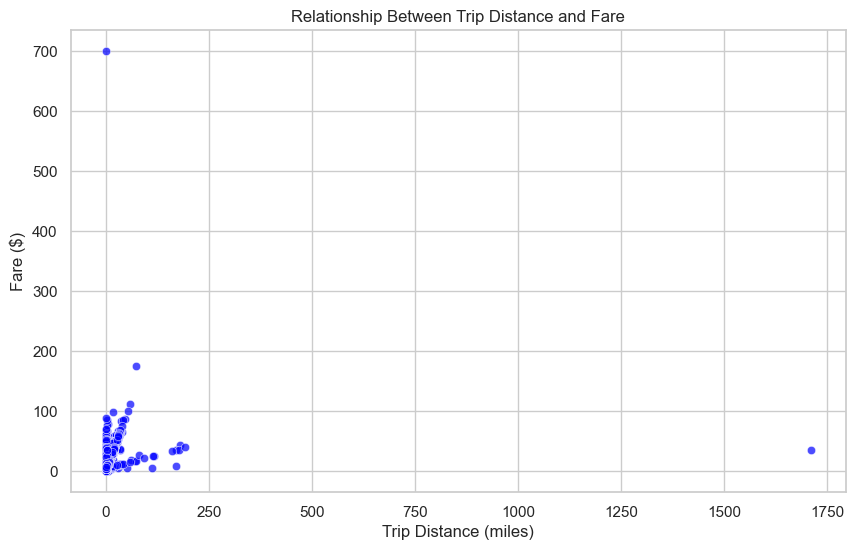

In [123]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=df, color='blue', alpha=0.7)

plt.title('Relationship Between Trip Distance and Fare')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.grid(True)
plt.show()

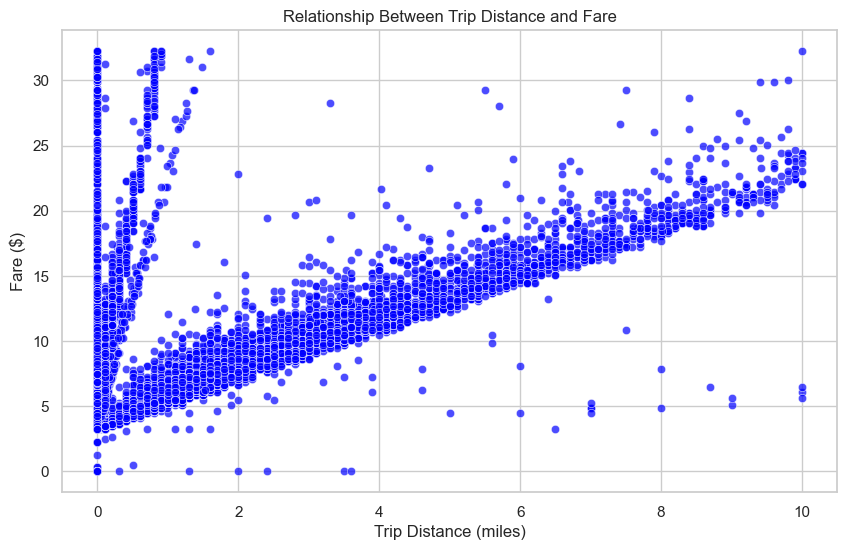

In [124]:
# Remove the outliers before plotting

# Calculate IQR for trip_miles and fare
Q1_miles = df['trip_miles'].quantile(0.25)
Q3_miles = df['trip_miles'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles

Q1_fare = df['fare'].quantile(0.25)
Q3_fare = df['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define upper bounds for both features to filter out very big outliers
upper_bound_miles = Q3_miles + 3 * IQR_miles 
upper_bound_fare = Q3_fare + 3 * IQR_fare   

# Filter the DataFrame to remove very big outliers
filtered_df = df[
    (df['trip_miles'] <= upper_bound_miles) & 
    (df['fare'] <= upper_bound_fare)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=filtered_df, color='blue', alpha=0.7)

plt.title('Relationship Between Trip Distance and Fare')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.grid(True)
plt.show()


### 3.d.b Calculate and interpret the correlation coefficient between the two variables.

In [125]:
correlation_coefficient = df['trip_miles'].corr(df['fare'])
print("Before removal of outliers:")
print(f' Correlation Coefficient between Trip Distance and Fare: {correlation_coefficient:.2f}')
correlation_coefficient = filtered_df['trip_miles'].corr(filtered_df['fare'])
print("After removal of outliers:")
print(f' Correlation Coefficient between Trip Distance and Fare: {correlation_coefficient:.2f}')

Before removal of outliers:
 Correlation Coefficient between Trip Distance and Fare: 0.22
After removal of outliers:
 Correlation Coefficient between Trip Distance and Fare: 0.51



Apart from a few outliers, the relationship shows three distinct lines between fare and distance. This indicates taxi provides services in three different price rates, possibly based on the type of vehicle or number of passengers.

The points outside the general trend could be due to a variety of factors, such as number of passengers, holidays, availability of drivers etc. 

### Q 3.d.c
Key Findings in Fare-Distance Relationship:

1. Distribution Pattern:
- Most trips cluster under 250 miles and $100
- Heavy concentration at very short distances (0-50 miles)
- A lot of entries have positive fare and 0 distance, which can be an error in data recorded

2. Pricing Implications:
- Base fare evident as a positive y-intercept is present
- Linear relationship between distance and fare, with three different slopes for different distance ranges